Primera Entrega : Proyecto de riesgo crediticio

Leandro Torres - Comision 61660 Data Science 1

Objetivo del trabajo : 

La intencion del trabajo es recorrer los datos que se tienen de prestamos otorgados por distintos motivos a diversos perfiles de clientes. Entre los motivos que encontramos para la aprobacion de los prestamos, esta  consolidacion de una deuda, hacer mejoras en el hogar, etc. 

Queremos identificar que tipos de perdidas se pueden estar sufriendo y, en base a ellas, crear un modelo predictivo automatico que pueda mejorar el sistema de aprobacion de creditos, otorgandoselo a clientes que no cumplan con los indicadores que sugieran un posible pago moroso. 

Preguntas y problemas que buscaremos resolver : 

* Que factores influyen para determinar si un cliente pagara o no un prestamos 
* Buscar insights que nos permitan identificar clientes que potencialmente no pagaran un prestamos a traves de comparacion de las variables obtenidas en el dataset. 
* Desarrollar un modelo de riesgo de credito de ser necesario para predecir las probabilidades de morosidad. 

In [110]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importacion de datos
url = "https://www.kaggle.com/datasets/ajay1735/hmeq-data"
data_credito = pd.read_csv('hmeq.csv')

Exploracion del dataset

El dataset elegido fue HMEQ de Kaggle https://www.kaggle.com/datasets/ajay1735/hmeq-data que presenta informacion sobre 5960 prestamistas. En las siguientes lineas se explorara la extension del dataset. 

Variables del dataset: 

* BAD : Variable binaria. 0 indica deuda al dia y 1 indica mora ( Mas de 90 dias desde el ultimo pago) 
* LOAN : Variable numerica continua. Monto en USD del prestamo solicitado. 
* MORTDUE : Variable numerica continua. Monto adeudado de la hipoteca. 
* VALUE : Variable numerica continua. Monto de la propiedad hipotecada. 
* REASON : Variable categorica. Razon para solicitar el prestamos. Debtcon es consolidacion de deuda y Homeimp es mejoras para el hogar 
* JOB : Variable categorica. Profesion o categoria profesional. 
* YOJ: Variable numerica discreta. Cantidad de tiempo desde que ingreso al trabajo actual. 
* DEROG: Variable numerica discreta. Numero de informes derogatorios importantes. Es informacion proporcionada por una institicuion financiera a las agencias de credito y se relaciona con la morosidad o la cancelacion de una cuenta de uan linea de credito. 
* DELINQ: Variable numerica discreta. Numero de lineas de credito morosas. 
* CLAGE: Variable numerica discreta. Edad expresada en meses de la linea de credito de mayor antiguedad, los modelos de puntuacion se consideran un minimo de 6 meses y recien a partir de 24 meses es fiable. 
* NINQ: Variable numerica discreta. Numero de veces que ha solicitado un nuevo credito en los ultimos 24 meses. 
* CLNO: Variable numerica discreta. Numero de lineas de credito abiertas. 
* DEBTINC. Variable numerica continua. Ratio deuda-ingreso (DTI), es la cantidad de ingresos brutos mensuales que una persona genera frente a la deuda que debe pagar por mes. Los prestamistas generalmente buscan ratios no mayores al 36%. 

In [10]:
# Amplitud del dataset
data_credito.shape

(5960, 13)

In [11]:
data_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [12]:
#Primeros 5 registros 
data_credito.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [13]:
data_credito.describe().round(2)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.0,5960.00,5442.00,5848.00,5445.00,5252.00,5380.00,5652.00,5450.00,5738.00,4693.00
mean,0.2,18607.97,73760.82,101776.05,8.92,0.25,0.45,179.77,1.19,21.30,33.78
std,0.4,11207.48,44457.61,57385.78,7.57,0.85,1.13,85.81,1.73,10.14,8.60
min,0.0,1100.00,2063.00,8000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52
25%,0.0,11100.00,46276.00,66075.50,3.00,0.00,0.00,115.12,0.00,15.00,29.14
50%,0.0,16300.00,65019.00,89235.50,7.00,0.00,0.00,173.47,1.00,20.00,34.82
75%,0.0,23300.00,91488.00,119824.25,13.00,0.00,0.00,231.56,2.00,26.00,39.00
max,1.0,89900.00,399550.00,855909.00,41.00,10.00,15.00,1168.23,17.00,71.00,203.31


In [14]:
data_credito.describe(include = object)

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


In [17]:
data_credito [data_credito.duplicated]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [15]:
#Identificar cantidad de nulos en los registros
missing_count = data_credito.isnull().sum()
print(data_credito.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


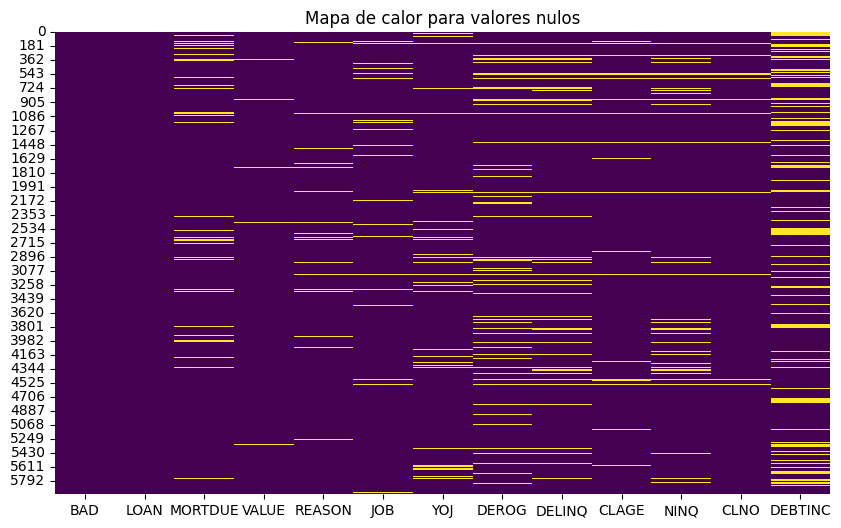

In [11]:
#Grafico para la distribucion de los nulos en las variables
plt.figure(figsize=(10,6))
sns.heatmap(data_credito.isnull(),cbar=False, cmap='viridis')
plt.title("Mapa de calor para valores nulos")
plt.show()

In [16]:
#Porcentaje de los nulos
missing_percent = data_credito.isnull().mean() *100
print(missing_percent)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


In [49]:
print(data_credito.columns)

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


In [52]:
#Distribucion de porcentajes de nulos
data_credito_missing = pd.DataFrame({'':data_credito.columns})
data_credito_missing['Cantidad de Datos Faltantes'] = data_credito.isnull().sum().values
data_credito_missing['Porcentaje de Datos Faltantes'] = (data_credito.isnull().mean() *100).values
print(data_credito_missing)
data_credito_missing = data_credito_missing.sort_values('Cantidad de Datos Faltantes', ascending=False)

             Cantidad de Datos Faltantes  Porcentaje de Datos Faltantes
0       BAD                            0                       0.000000
1      LOAN                            0                       0.000000
2   MORTDUE                          518                       8.691275
3     VALUE                          112                       1.879195
4    REASON                          252                       4.228188
5       JOB                          279                       4.681208
6       YOJ                          515                       8.640940
7     DEROG                          708                      11.879195
8    DELINQ                          580                       9.731544
9     CLAGE                          308                       5.167785
10     NINQ                          510                       8.557047
11     CLNO                          222                       3.724832
12  DEBTINC                         1267                      21

'DEBTINC' es la variable con la mayor cantidad de valores nulos (21.3%)

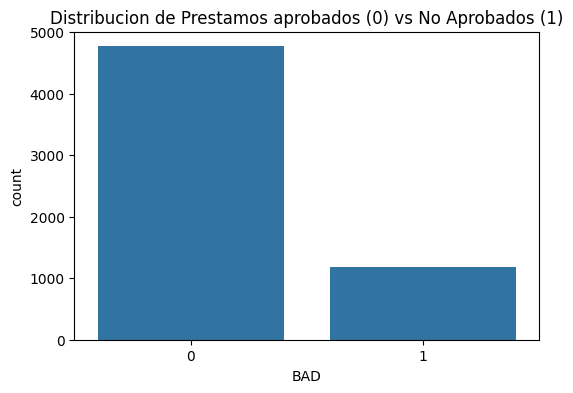

In [57]:
#Grafico de barras para la variable target 'BAD'
plt.figure(figsize=(6,4))
sns.countplot(x='BAD',data=data_credito)
plt.title('Distribucion de Prestamos aprobados (0) vs No Aprobados (1)')
plt.show()

In [59]:
#Variable Target 'BAD' 
def BADvalues_info(data_credito):
    BAD_count = data_credito['BAD']. value_counts()
    BAD_percent = (100 * BAD_count / data_credito.shape[0]).round(1)
    data_credito_values = pd.DataFrame ({'Cantidad': BAD_count,
                                         'Porcentaje': BAD_percent})
    return data_credito_values
BADvalues_info(data_credito)

,Cantidad,Porcentaje
BAD,,
0,4771,80.1
1,1189,19.9


La variable 'BAD' es nuestra variable objetivo. Un insigths que vemos es que hay un gran desbalance porque alrededor del 20% son clientes con deuda morosa. 

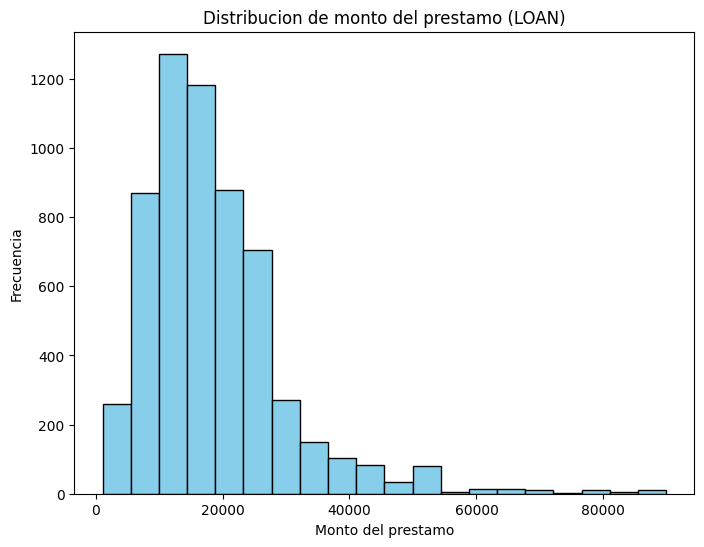

In [62]:
#Distribucion de las variables numericas
plt.figure(figsize=(8,6))
plt.hist(data_credito['LOAN'].dropna(), bins=20,color='skyblue',edgecolor='black')
plt.title('Distribucion de monto del prestamo (LOAN)')
plt.xlabel('Monto del prestamo')
plt.ylabel('Frecuencia')
plt.show()


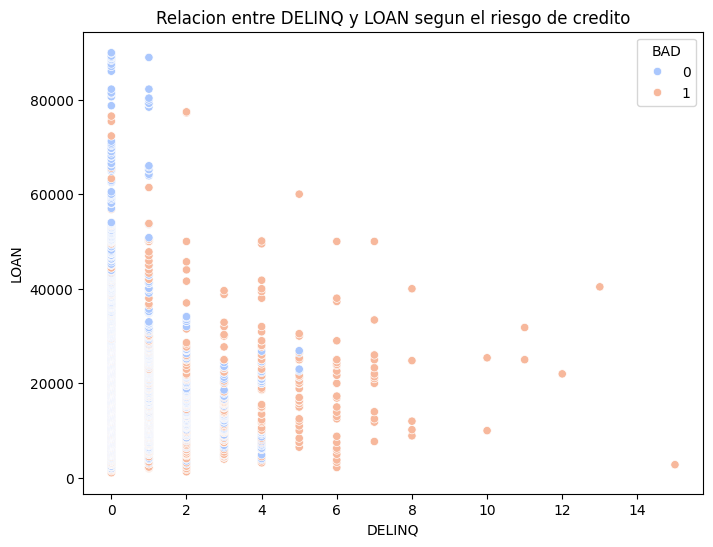

In [65]:
#Dispersion entre DELINQ y LOAN, con 'BAD' como hue 
plt.figure(figsize=(8,6))
sns.scatterplot(x='DELINQ', y='LOAN', hue='BAD', data=data_credito, palette='coolwarm')
plt.title('Relacion entre DELINQ y LOAN segun el riesgo de credito')
plt.show()

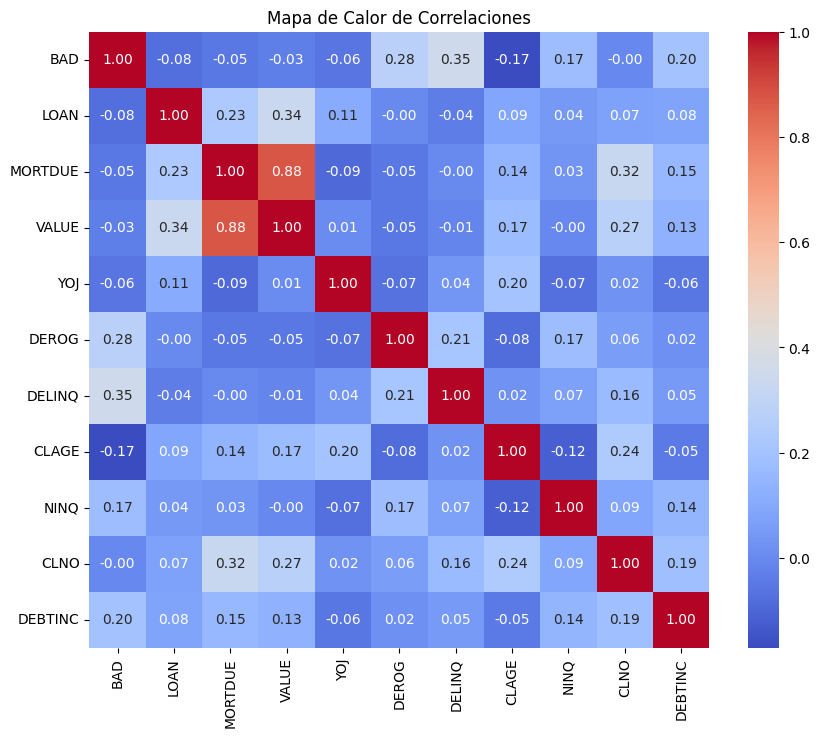

In [69]:
#Mapa de correlacion
numeric_data = data_credito.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

En este mapa de correlacion de las variables se puede interpretar que hay un 0.88 de relacion positiva entre MORTDUE y VALUE, lo cual indica que el valor de la propiedad alto, influye en las deudas hipotecarias, lo cual resulta logico para tenerlo en cuenta en un potencial modelo predictivo. Tambien se pude ver una relacion entre DELINQ Y BAD, indicando que a medida que va a apareciendo mora, mayor riesgo de incumplimiento del prestamo. 

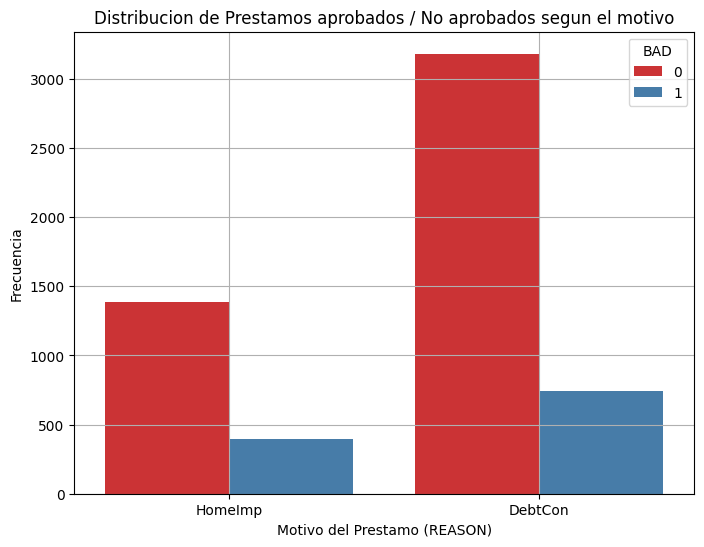

In [71]:

# Distribucion del monto del prestamo (LOAN)
plt.figure(figsize=(8,6))
sns.countplot(x='REASON', hue = 'BAD', data=data_credito, palette='Set1')
plt.title('Distribucion de Prestamos aprobados / No aprobados segun el motivo')
plt.xlabel('Motivo del Prestamo (REASON)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

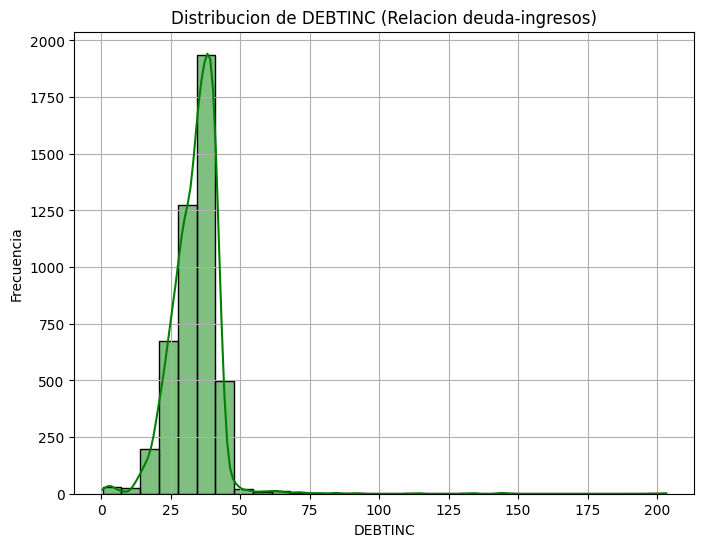

In [83]:
#Distribucion de deuda/ingresos
plt.figure(figsize=(8,6))
sns.histplot(data_credito['DEBTINC'].dropna(),kde=True,color='green',bins=30)
plt.title('Distribucion de DEBTINC (Relacion deuda-ingresos)')
plt.xlabel('DEBTINC')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

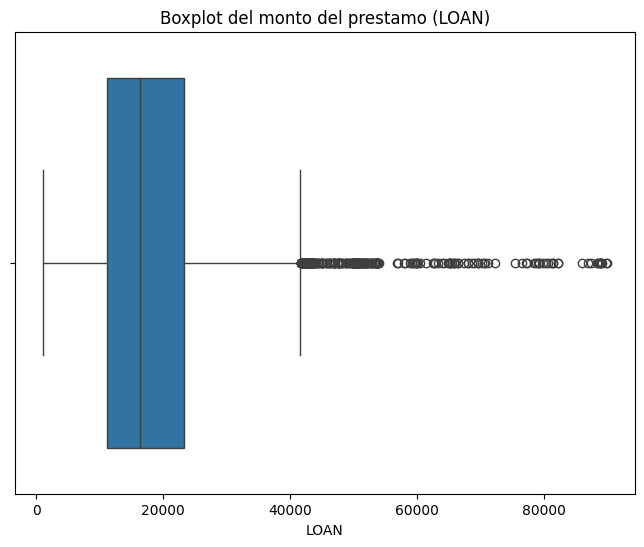

In [84]:
#Boxplot para ver outliers en la variable LOAN
plt.figure(figsize=(8,6))
sns.boxplot(x=data_credito['LOAN'])
plt.title('Boxplot del monto del prestamo (LOAN)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17264\2076663774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BAD', y='YOJ', data=data_credito, palette= 'Set2')


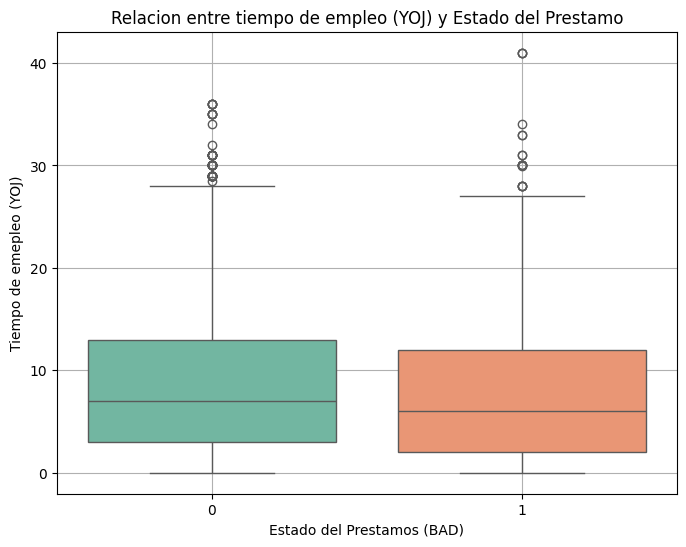

In [87]:
#Boxplot de la relacion entre YOJ y BAD
plt.figure(figsize=(8,6))
sns.boxplot(x='BAD', y='YOJ', data=data_credito, palette= 'Set2')
plt.title ('Relacion entre tiempo de empleo (YOJ) y Estado del Prestamo')
plt.xlabel('Estado del Prestamos (BAD)')
plt.ylabel('Tiempo de emepleo (YOJ)')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

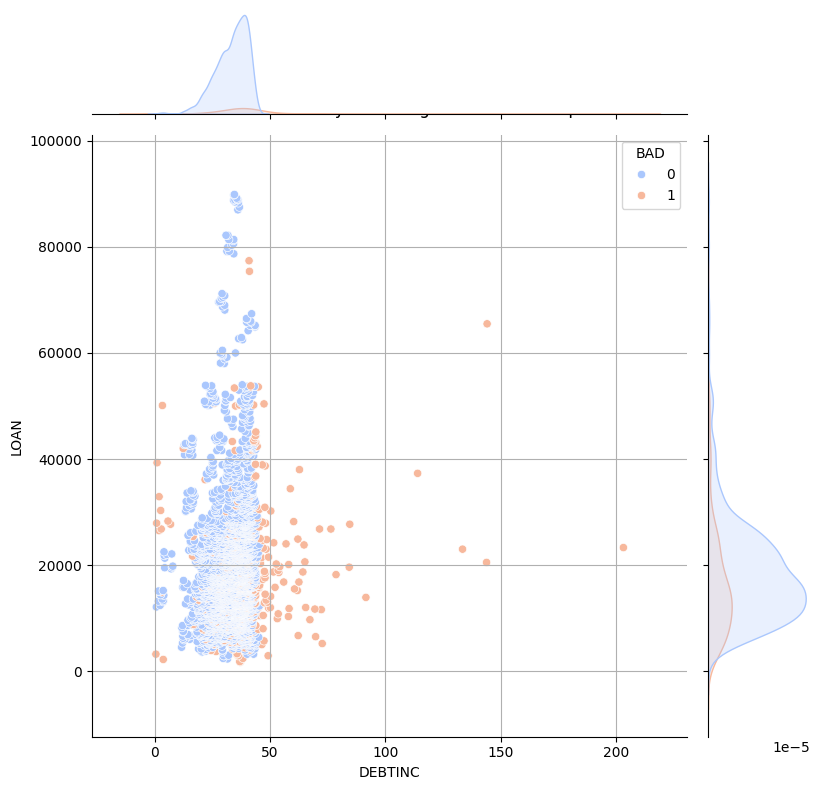

In [90]:
#Distribucion conjunta de DEBTINC y BAD (hue)
plt.figure(figsize=(8,6))
sns.jointplot(x='DEBTINC',y='LOAN',hue='BAD', data=data_credito, palette='coolwarm',kind="scatter", height=8)
plt.title('Relacion entre DEBTINC y LOAN segun el estado del prestamo', y=1.02)
plt.grid(True)
plt.show()

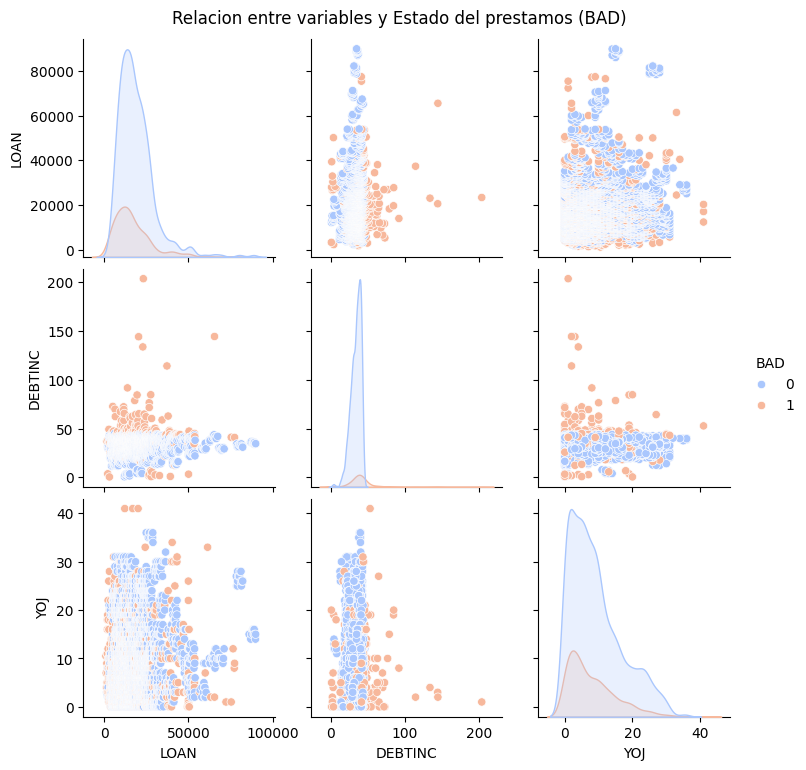

In [91]:
#Pairplot de variables 
sns.pairplot(data_credito[['LOAN','DEBTINC','YOJ','BAD']], hue='BAD', palette='coolwarm', diag_kind='kde')
plt.suptitle('Relacion entre variables y Estado del prestamos (BAD)', y=1.02)
plt.grid(True)
plt.show()

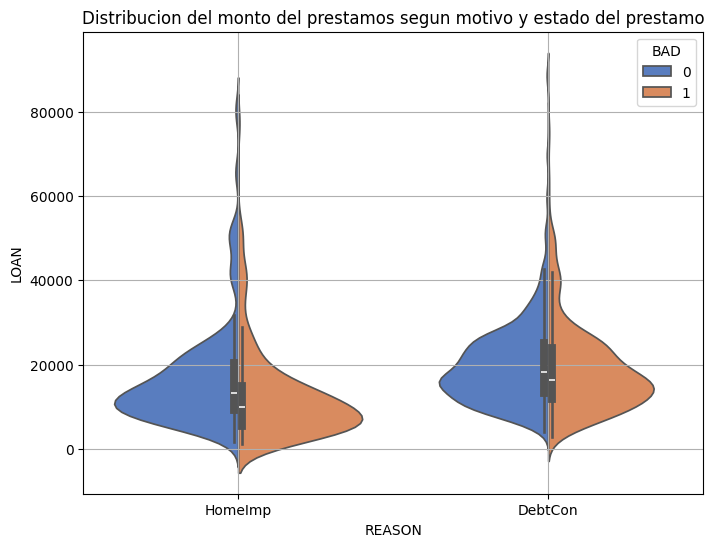

In [93]:
#Violinplot para comparar monto del prestamo segun el motivo
plt.figure(figsize=(8,6))
sns.violinplot(x='REASON',y='LOAN',hue='BAD',data=data_credito,split=True,palette='muted')
plt.title('Distribucion del monto del prestamos segun motivo y estado del prestamo')
plt.grid(True)
plt.show()

Se puede apreciar que segun la variable "Reason", "DebtCon" es el motivo principal para solicitar un prestamo, entre quienes pagan o no sus deudas. A partir de esta muestra, se puede interpretar que si la razon es "Homeimp", se disminuye la diferencia entre queiens pagan y quienes no. 